In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:

!ls /content/gdrive/MyDrive/Conser-visionCL


'submission_format (1).csv'   test_features.csv   train_features.csv
 test_features		      train_features	  train_labels.csv


In [4]:
!cp -r /content/gdrive/MyDrive/Conser-visionCL /content/


In [5]:
import tensorflow as tf
import keras
# print(tf.__version__)
print(keras.__version__)


2.12.0


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import models, layers, optimizers
from keras.models import Sequential, load_model, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf
# from tf.keras.utils import to_categorical
from PIL import Image
# from keras.applications import ResNet50V2
from keras.preprocessing.image import ImageDataGenerator
import os
from keras.preprocessing import image
# from keras.applications.resnet50 import ResNet50


In [7]:
# from keras.applications.resnet50 import ResNet50
# from keras.models import ResNet50
from keras.applications.resnet import ResNet50

In [8]:

train_features = pd.read_csv("/content/Conser-visionCL/train_features.csv", index_col="id")
test_features = pd.read_csv("/content/Conser-visionCL/test_features.csv", index_col="id")
train_labels = pd.read_csv("/content/Conser-visionCL/train_labels.csv", index_col="id")
train_path = '/content/Conser-visionCL/train_features'
test_path = '/content/Conser-visionCL/test_features'

In [9]:
train_features.head()

,filepath,site
id,,
ZJ000000,train_features/ZJ000000.jpg,S0120
ZJ000001,train_features/ZJ000001.jpg,S0069
ZJ000002,train_features/ZJ000002.jpg,S0009
ZJ000003,train_features/ZJ000003.jpg,S0008
ZJ000004,train_features/ZJ000004.jpg,S0036


In [10]:
train_features.index = train_features.index.astype(str) + '.jpg'
# tr(train_df['id'][1]) + '.png'
train_features.head()

,filepath,site
id,,
ZJ000000.jpg,train_features/ZJ000000.jpg,S0120
ZJ000001.jpg,train_features/ZJ000001.jpg,S0069
ZJ000002.jpg,train_features/ZJ000002.jpg,S0009
ZJ000003.jpg,train_features/ZJ000003.jpg,S0008
ZJ000004.jpg,train_features/ZJ000004.jpg,S0036


In [11]:
test_features.head()

,filepath,site
id,,
ZJ016488,test_features/ZJ016488.jpg,S0082
ZJ016489,test_features/ZJ016489.jpg,S0040
ZJ016490,test_features/ZJ016490.jpg,S0040
ZJ016491,test_features/ZJ016491.jpg,S0041
ZJ016492,test_features/ZJ016492.jpg,S0040


In [12]:
test_features.index = test_features.index.astype(str) + '.jpg'
# tr(train_df['id'][1]) + '.png'
test_features.head()

,filepath,site
id,,
ZJ016488.jpg,test_features/ZJ016488.jpg,S0082
ZJ016489.jpg,test_features/ZJ016489.jpg,S0040
ZJ016490.jpg,test_features/ZJ016490.jpg,S0040
ZJ016491.jpg,test_features/ZJ016491.jpg,S0041
ZJ016492.jpg,test_features/ZJ016492.jpg,S0040


In [13]:
train_labels.head()

,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
id,,,,,,,,
ZJ000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
ZJ000001,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
ZJ000002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
ZJ000003,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
ZJ000004,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [14]:
train_labels.index = train_labels.index.astype(str) + '.jpg'
# tr(train_df['id'][1]) + '.png'
train_labels.head()

,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
id,,,,,,,,
ZJ000000.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
ZJ000001.jpg,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
ZJ000002.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
ZJ000003.jpg,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
ZJ000004.jpg,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [15]:
species_labels = sorted(train_labels.columns.unique())
species_labels

['antelope_duiker',
 'bird',
 'blank',
 'civet_genet',
 'hog',
 'leopard',
 'monkey_prosimian',
 'rodent']

In [16]:
# from PIL import Image
# import os

# Set the path of the folder containing the images
folder_path = train_path

# Loop through all the files in the folder
for filename in os.listdir(folder_path):
    # Check if the file is an image
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Open the image
        img = Image.open(os.path.join(folder_path, filename))
        # Resize the image to 256x256
        img = img.resize((256, 256))
        # Convert the image to RGB if it is grayscale
        if img.mode != 'RGB':
            img = img.convert('RGB')
        # Save the resized image with the same filename
        img.save(os.path.join(folder_path, filename))


In [17]:
from PIL import Image
import os

# Set the path of the folder containing the images
folder_path = test_path

# Loop through all the files in the folder
for filename in os.listdir(folder_path):
    # Check if the file is an image
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Open the image
        img = Image.open(os.path.join(folder_path, filename))
        # Resize the image to 256x256
        img = img.resize((256, 256))
        # Convert the image to RGB if it is grayscale
        if img.mode != 'RGB':
            img = img.convert('RGB')
        # Save the resized image with the same filename
        img.save(os.path.join(folder_path, filename))


In [18]:
print(train_labels.index[1])

ZJ000001.jpg


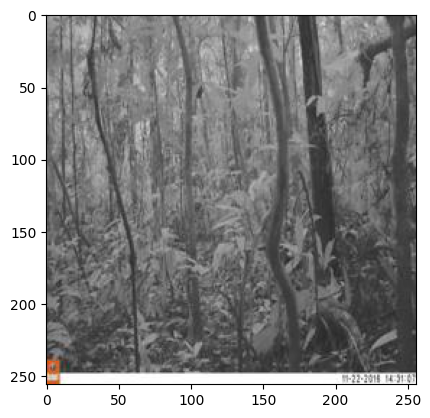

In [19]:
# Load the first image from the training set
# img = Image.open(train_path + train_df['id'][0] + '.png')
img = Image.open(train_path + '/' + str(train_labels.index[1]))

# Display the image
plt.imshow(img)
plt.show()

In [20]:
train_labels.sum().sort_values(ascending=False)

monkey_prosimian    2492.0
antelope_duiker     2474.0
civet_genet         2423.0
leopard             2254.0
blank               2213.0
rodent              2013.0
bird                1641.0
hog                  978.0
dtype: float64

In [21]:
train_labels.sum().divide(train_labels.shape[0]).sort_values(ascending=False)

monkey_prosimian    0.151140
antelope_duiker     0.150049
civet_genet         0.146955
leopard             0.136705
blank               0.134219
rodent              0.122089
bird                0.099527
hog                 0.059316
dtype: float64

In [22]:
frac = 1.0

y = train_labels.sample(frac=frac, random_state=1)
X = train_features.loc[y.index].filepath.to_frame()



In [23]:
y.value_counts()

antelope_duiker  bird  blank  civet_genet  hog  leopard  monkey_prosimian  rodent
0.0              0.0   0.0    0.0          0.0  0.0      1.0               0.0       2492
1.0              0.0   0.0    0.0          0.0  0.0      0.0               0.0       2474
0.0              0.0   0.0    1.0          0.0  0.0      0.0               0.0       2423
                              0.0          0.0  1.0      0.0               0.0       2254
                       1.0    0.0          0.0  0.0      0.0               0.0       2213
                       0.0    0.0          0.0  0.0      0.0               1.0       2013
                 1.0   0.0    0.0          0.0  0.0      0.0               0.0       1641
                 0.0   0.0    0.0          1.0  0.0      0.0               0.0        978
dtype: int64

In [24]:

X_train, X_eval, y_train, y_eval = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=3
)

In [25]:
X_train.head()

,filepath
id,
ZJ009092.jpg,train_features/ZJ009092.jpg
ZJ007755.jpg,train_features/ZJ007755.jpg
ZJ008385.jpg,train_features/ZJ008385.jpg
ZJ005720.jpg,train_features/ZJ005720.jpg
ZJ015590.jpg,train_features/ZJ015590.jpg


In [26]:
y_train.head()

,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
id,,,,,,,,
ZJ009092.jpg,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
ZJ007755.jpg,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
ZJ008385.jpg,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
ZJ005720.jpg,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
ZJ015590.jpg,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [27]:
X_train.shape, y_train.shape, X_eval.shape, y_eval.shape

((11541, 1), (11541, 8), (4947, 1), (4947, 8))

Next, let's validate that our split has resulted in roughly similar relative distributions of species across the train and eval sets (because of how we passed `stratify=y` above).

In [28]:
split_pcts = pd.DataFrame(
    {
        "train": y_train.idxmax(axis=1).value_counts(normalize=True),
        "eval": y_eval.idxmax(axis=1).value_counts(normalize=True),
    }
)
print("Species percentages by split")
(split_pcts.fillna(0) * 100).astype(int)

Species percentages by split


,train,eval
monkey_prosimian,15,15
antelope_duiker,15,14
civet_genet,14,14
leopard,13,13
blank,13,13
rodent,12,12
bird,9,9
hog,5,5


In [29]:
from tensorflow.keras import optimizers

In [30]:
#check the input dimensions our data has    
print(X_train.shape)
print(X_eval.shape)


(11541, 1)
(4947, 1)


In [31]:
# Get the filenames of the test images
test_filenames = os.listdir(test_path)
print(test_filenames[:10])

['ZJ016700.jpg', 'ZJ018824.jpg', 'ZJ017657.jpg', 'ZJ017234.jpg', 'ZJ018313.jpg', 'ZJ016745.jpg', 'ZJ020358.jpg', 'ZJ019762.jpg', 'ZJ017032.jpg', 'ZJ019574.jpg']


In [32]:
X_train.reset_index( inplace=True)
X_eval.reset_index( inplace=True)



In [33]:
y_train.reset_index( inplace=True)
y_eval.reset_index( inplace=True)

In [34]:
# X_train = X_train.rename(columns={'index': 'id'})
#####*it seems all we need in our procedure is the y_tarin and images
y_train.shape


(11541, 9)

In [35]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=y_train,
    directory=train_path,
    x_col="id",
    y_col=["antelope_duiker", "bird", "blank", "civet_genet", "hog", "leopard", "monkey_prosimian", "rodent"],
    target_size=(256, 256),
    batch_size=32,
    class_mode="raw"
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=y_eval,
    directory=train_path,
    x_col="id",
    y_col=["antelope_duiker", "bird", "blank", "civet_genet", "hog", "leopard", "monkey_prosimian", "rodent"],
    target_size=(256, 256),
    batch_size=32,
    class_mode="raw"
)


Found 11541 validated image filenames.
Found 4947 validated image filenames.


In [36]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
model = models.Sequential()
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.BatchNormalization())
model.add(layers.Dense(8, activation='sigmoid'))

94765736/94765736 [==============================] - 3s 0us/step


In [37]:
#loss we use CrossEntropyLoss not categorical_crossentropy
#optimizer we use sgd
#metrics we use accuracy
#lr=0.001, momentum=0.9
model.compile(loss='binary_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9), metrics=['accuracy'])


In [38]:

# Train the model
print("Training the model")
model.fit(train_generator, epochs=10, validation_data=val_generator)

Training the model
Epoch 1/10
361/361 [==============================] - 309s 773ms/step - loss: 0.3667 - accuracy: 0.4727 - val_loss: 0.4142 - val_accuracy: 0.1478
Epoch 2/10
361/361 [==============================] - 260s 719ms/step - loss: 0.2295 - accuracy: 0.5975 - val_loss: 0.5182 - val_accuracy: 0.1443
Epoch 3/10
361/361 [==============================] - 255s 705ms/step - loss: 0.1964 - accuracy: 0.6653 - val_loss: 0.2490 - val_accuracy: 0.5771
Epoch 4/10
361/361 [==============================] - 258s 712ms/step - loss: 0.1741 - accuracy: 0.7091 - val_loss: 0.1883 - val_accuracy: 0.6925
Epoch 5/10
361/361 [==============================] - 257s 711ms/step - loss: 0.1552 - accuracy: 0.7498 - val_loss: 0.1648 - val_accuracy: 0.7342
Epoch 6/10
361/361 [==============================] - 256s 710ms/step - loss: 0.1385 - accuracy: 0.7795 - val_loss: 0.1923 - val_accuracy: 0.7297
Epoch 7/10
361/361 [==============================] - 254s 704ms/step - loss: 0.1266 - accuracy: 0.8006 -

In [ ]:
samplesub = pd.read_csv('submission_format (1).csv')
samplesub.head()

,id,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
0,ZJ016488,0.048233,0.189185,0.044914,0.199588,0.106118,0.132915,0.166410,0.112637
1,ZJ016489,0.097078,0.061400,0.026409,0.241530,0.144344,0.051780,0.287811,0.089648
2,ZJ016490,0.124658,0.089101,0.189225,0.174494,0.180540,0.079995,0.085672,0.076314
3,ZJ016491,0.109966,0.048397,0.055598,0.323600,0.322356,0.063252,0.008160,0.068671
4,ZJ016492,0.165742,0.184610,0.005431,0.136806,0.000389,0.122078,0.151521,0.233423


In [42]:
test_features.head()

,filepath,site
id,,
ZJ016488.jpg,test_features/ZJ016488.jpg,S0082
ZJ016489.jpg,test_features/ZJ016489.jpg,S0040
ZJ016490.jpg,test_features/ZJ016490.jpg,S0040
ZJ016491.jpg,test_features/ZJ016491.jpg,S0041
ZJ016492.jpg,test_features/ZJ016492.jpg,S0040


In [46]:
test_features.reset_index(inplace=True) 

In [47]:
# create an ImageDataGenerator object
test_datagen = ImageDataGenerator(rescale=1./255)

# use flow_from_dataframe() to generate the test data
test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_features,
        directory=test_path,
        x_col="id",
        y_col=None,
        batch_size=32,
        seed=42,
        shuffle=False,
        class_mode=None,
        target_size=(256, 256))

Found 4464 validated image filenames.


In [48]:


# make predictions on the test data
test_predictions = model.predict(test_generator)

# create a dataframe to store the predicted labels
test_pred_df = pd.DataFrame(test_predictions, columns=['antelope_duiker', 'bird', 'blank', 'civet_genet', 'hog', 'leopard', 'monkey_prosimian', 'rodent'])

# add the image IDs to the dataframe
test_pred_df.insert(0, 'id', test_features['id'])

# save the predicted labels to a csv file
test_pred_df.to_csv('test_predictions.csv', index=False)


140/140 [==============================] - 22s 149ms/step


In [49]:
pd.read_csv('test_predictions.csv')

,id,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
0,ZJ016488.jpg,0.036582,0.000384,0.032609,0.923330,0.000951,0.000159,0.005464,0.007580
1,ZJ016489.jpg,0.045661,0.642550,0.106337,0.000223,0.009886,0.033556,0.000555,0.043445
2,ZJ016490.jpg,0.138591,0.009818,0.477055,0.013705,0.055606,0.003059,0.001591,0.058073
3,ZJ016491.jpg,0.000101,0.000008,0.000016,0.000126,0.000036,0.999891,0.000009,0.005851
4,ZJ016492.jpg,0.133220,0.038250,0.059930,0.000959,0.002250,0.000010,0.005230,0.237362
...,...,...,...,...,...,...,...,...,...
4459,ZJ020947.jpg,0.171619,0.043418,0.420777,0.001315,0.002894,0.000395,0.487773,0.027565
4460,ZJ020948.jpg,0.603833,0.003535,0.198182,0.000663,0.006697,0.001306,0.026006,0.024863
4461,ZJ020949.jpg,0.003396,0.000008,0.778240,0.192186,0.001396,0.000246,0.000957,0.005460
4462,ZJ020950.jpg,0.171580,0.028122,0.010301,0.006272,0.147383,0.000117,0.010743,0.007164


In [50]:
model.save('my_model.h5')
